## Pokemon Analysis

This analysis is of the Pokemon dataset which contains pokemon and their related information (i.e. attack power, defense, type and etc.). Ultimately the goal is to develop a classifier capable of determining whether or not a pokemon is legendary or not. The data for this analysis comes from https://www.kaggle.com/abcsds/pokemon. 

The analysis is broken up into the following parts: 
* Preprocessing - cleaning and checking the data to make sure in proper format
* Data Exploration - inspection of data to see which features may be informative to the model
* Modelling - Development of a model to predict whether or not a pokemon is legendary or not

Note: This is meant as an example workflow for exploring data and developing a model. 

## Preprocessing

In [1]:
#import initial packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in the data file 
poke_df = pd.read_csv('Pokemon.csv')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#look at the types of the pokemon 
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Looks like there are 800 observations total and that the types of the data are correct however type 2 is missing nearly half of its values. I will dig into this later on to determine further to determine if this feature is worth keeping or not.

Next I will check to see if there are any repeated pokemon in the dataset. Luckily the data set includes an id column titled '#', so I will use this to see if there are multiples of the same id.

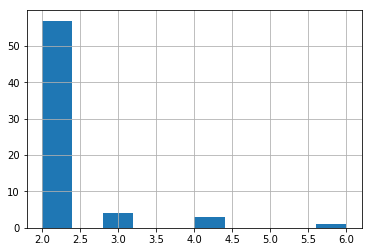

In [4]:
tmp = poke_df['#'].value_counts()
tmp[tmp > 1].hist()

The above output suuggests that we have multiple pokemon ids that appear more then once. Therefore I will dig into this further to see if there are distinctions between these pokemon. First I will check to see if the ids appear across generations by creating a new id including the original id# and the generation.

In [29]:
poke_df['New_ID'] = poke_df['#'].astype(str).str.cat( poke_df['Generation'].astype(str))

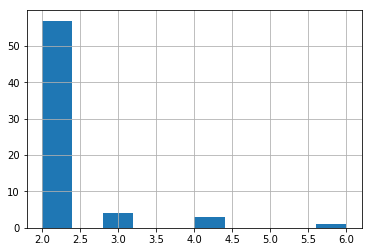

In [30]:
tmp = poke_df['New_ID'].value_counts()
tmp[tmp > 1].hist()

Looking at the above output suggests that the multiple ids come from pokemon that span multiple generations. However it is possible that some of their stats change from generations to generation. So I will need to explore this to make sure if this is the case or not.  

In [7]:
poke_df['tmp'] = np.ones(len(poke_df['#']))
countdf = poke_df.groupby('New_ID').count()
mult_df = poke_df.loc[poke_df['New_ID'].isin(countdf[countdf['tmp'] > 1].index)]
mult_df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New_ID,tmp
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,31,1.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,31,1.0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,61,1.0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,61,1.0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,61,1.0
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,91,1.0
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,91,1.0
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,151,1.0
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,151,1.0
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False,181,1.0


Looking at the output above although some of the pokemon share the same id because they are technically the same pokemon, they are actually slightly different between generations and therefore I will not drop them from the dataset.

## Data exploration

First I will check to see if there is a class imbalance in terms of the pokemon being legendary or not.

In [8]:
#create coded column for legendary primaruly for visualization purposes
poke_df['Legendary_Coded'] = poke_df['Legendary'].apply(lambda x: 'Legendary' if x == True else 'Non-Legendary')

Non-Legendary    735
Legendary         65
Name: Legendary_Coded, dtype: int64

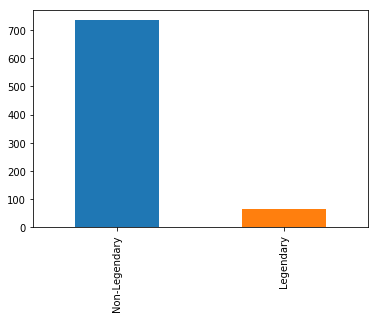

In [9]:
poke_df['Legendary_Coded'].value_counts().plot(kind='bar')
poke_df['Legendary_Coded'].value_counts()

The above output shows that there is a large imbalance in the data. More specifically there are much less legendary pokemon as compared to non-legendary pokemon. Now we can check to see how some of the other variables in the dataset correlate with being legendary.

In [10]:
tmp = poke_df[['New_ID','Attack','Defense','HP','Total','Sp. Atk', 'Sp. Def','Speed','Legendary_Coded']]
df_long = pd.melt(tmp, id_vars = ['New_ID','Legendary_Coded'], var_name = 'Feature')

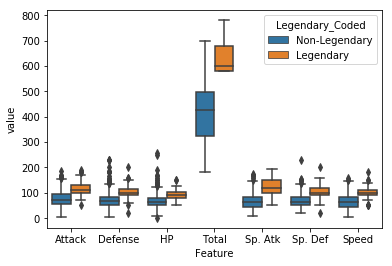

In [11]:
sns.boxplot(x='Feature', y='value', hue='Legendary_Coded', data=df_long)

The above output shows that there is a good amount of separation between the classes across the numeric features. Especially in regards to Total. I will also look to see if there are distinctions due to interactions between pairs of the features.

/Users/jonlandrigan/anaconda/envs/spark/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


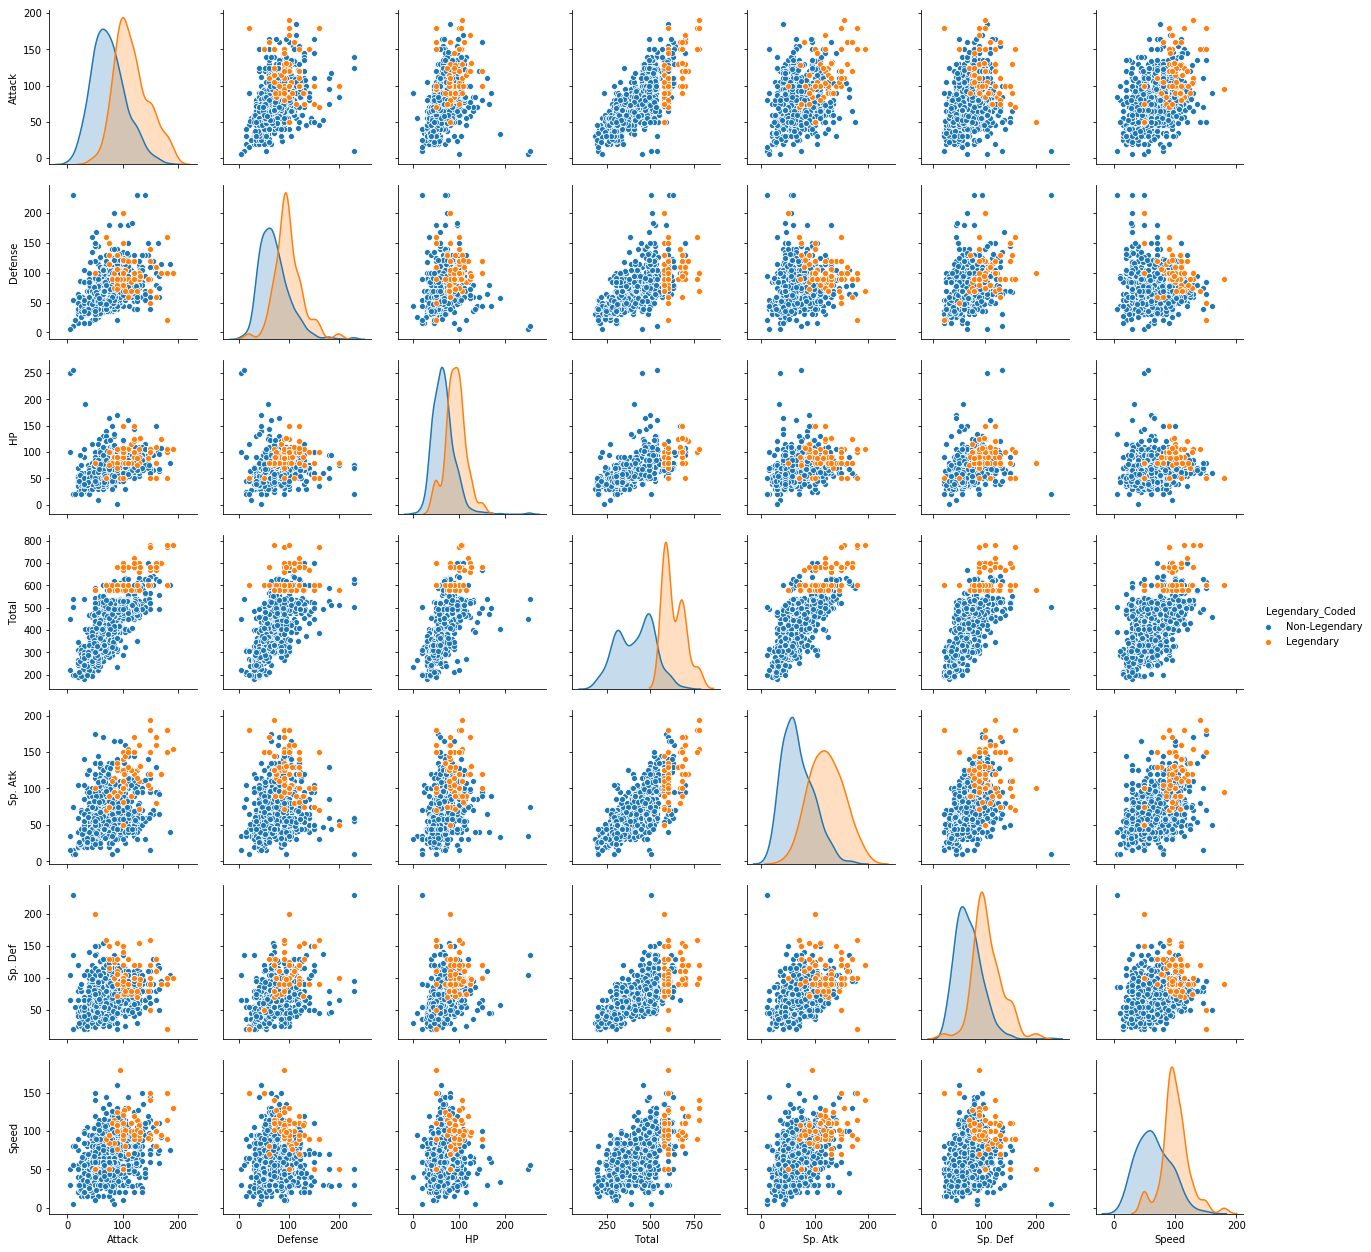

In [12]:
#Look at the interactions between the numeric fts and the legendary status
sns.pairplot(poke_df[['Attack','Defense','HP','Total','Sp. Atk', 'Sp. Def','Speed','Legendary_Coded']], hue='Legendary_Coded')

It appears that there are some interactions though others show a fair amount of overlap. Moreover it appears including each of these in the initial model could be informative. Next I will check to see if there are correlations between these features as it will inform the model choice. 

[Text(0,0,'Attack'),
 Text(0,0,'Defense'),
 Text(0,0,'HP'),
 Text(0,0,'Total'),
 Text(0,0,'Sp. Atk'),
 Text(0,0,'Sp. Def'),
 Text(0,0,'Speed')]

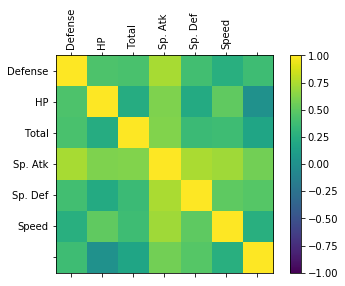

In [13]:
import matplotlib.pyplot as plt
fts = ['Attack','Defense','HP','Total','Sp. Atk', 'Sp. Def','Speed']
correlations = poke_df[fts].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(labels=fts, rotation=90)
ax.set_yticklabels(fts)

There appear to be moderate correlations between the numeric features and therefore I will need to account for this when developing the model by using a model such as random forests.

Next I will look to see if there are differences in terms of the categorical features and being legendary.

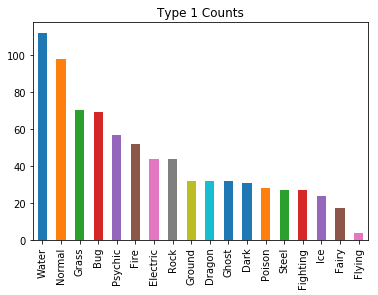

In [39]:
poke_df['Type 1'].value_counts().plot(kind='bar', title='Type 1 Counts')

Text(0.5,1,'Raw Legendary Counts by Type 1')

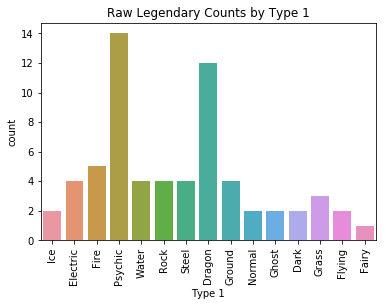

In [46]:
#plot the counts of legendary by type to see if there are differences between the type 1 counts
tpPlot = sns.countplot(x='Type 1', data=poke_df[poke_df['Legendary'] == True] )
tpPlot.set_xticklabels((tpPlot.get_xticklabels()),rotation=90)
tpPlot.set_title('Raw Legendary Counts by Type 1')

Text(0.5,1,'Proportion Legendary Type 1')

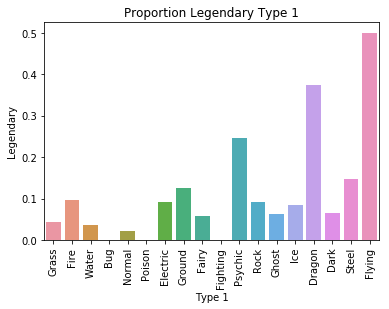

In [42]:
tpPlot = sns.barplot(x='Type 1', y='Legendary',data=poke_df, ci=None)
tpPlot.set_xticklabels((tpPlot.get_xticklabels()),rotation=90)
tpPlot.set_title('Proportion Legendary Type 1')

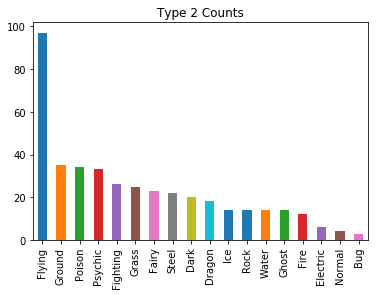

In [45]:
poke_df['Type 2'].value_counts().plot(kind='bar', title='Type 2 Counts')

Text(0.5,1,'Raw Legendary Counts by Type 2')

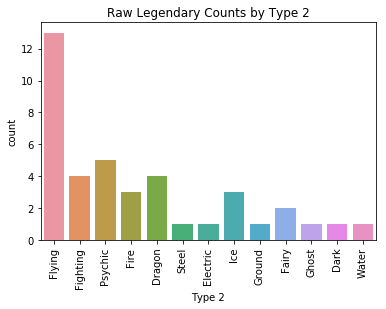

In [44]:
tpPlot = sns.countplot(x='Type 2', data=poke_df[poke_df['Legendary'] == True] )
tpPlot.set_xticklabels((tpPlot.get_xticklabels()),rotation=90)
tpPlot.set_title('Raw Legendary Counts by Type 2')

Text(0.5,1,'Proportion Legendary Type 2')

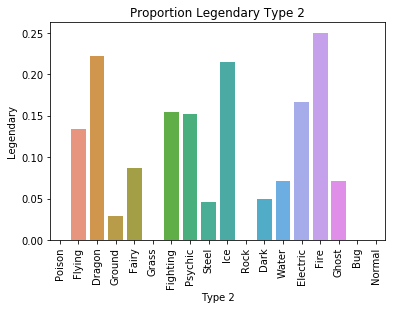

In [43]:
tpPlot = sns.barplot(x='Type 2', y='Legendary',data=poke_df, ci=None)
tpPlot.set_xticklabels((tpPlot.get_xticklabels()),rotation=90)
tpPlot.set_title('Proportion Legendary Type 2')

Looking at the above type plots it appears that they could also provide useful information to the model.

Next Ill look to see if there is an association between having two type and being legendary or not

In [16]:
poke_df['Num_Types'] = poke_df['Type 2'].isnull()
poke_df['Num_Types'] = poke_df['Num_Types'].apply(lambda x: '1 Type' if x == True else '2 Types')

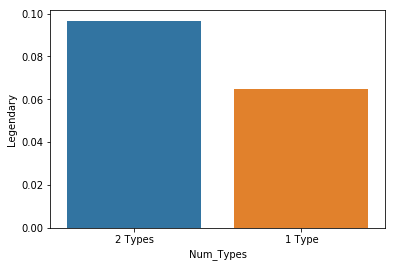

In [48]:
sns.barplot(x='Num_Types', y='Legendary', ci=None,data=poke_df)

The above suggests that if a pokemon has 2 types it is slightly more likely to be legendary then if it is of only one type.

Finally Ill look to see if there are differences by generation.

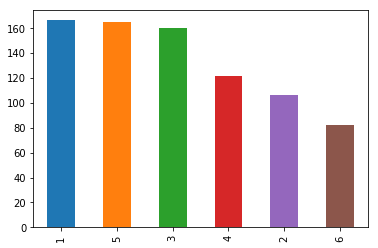

In [34]:
#first convert the generation to str type to make these bins.
poke_df['Generation'] = poke_df['Generation'].astype(str)
poke_df['Generation'].value_counts().plot(kind='bar')

Given there are different numbers of pokemon in each generation I will look at the proportion legendary in each generation.

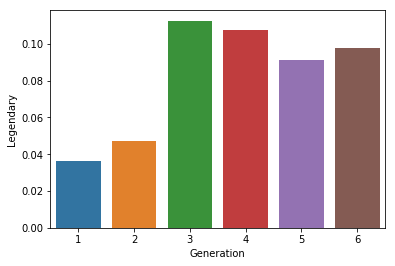

In [49]:
sns.barplot(x='Generation',y='Legendary',ci=None, data=poke_df)

Looking at the proportion of legendary pokemon by generation it does appear that there is an increas in the number of legendary pokemon post generation 2. 

## Modelling

In [67]:
from sklearn.preprocessing import LabelEncoder

#create extra type columns so that when look at ft importance know the differnce between types 
model_df = poke_df
model_df['Type_1_Coded'] = model_df['Type 1'].apply(lambda x: x+' Type1')
model_df['Type_2_Coded'] = model_df.apply(lambda x: x['Type 2'] if pd.isnull(x['Type 2']) else x['Type 2'] + ' Type 2', axis=1)
model_df['NumTypes_Coded'] = model_df['Num_Types'].apply(lambda x: 1 if x == '2 Types' else 0)

#Dummy code the categorical variables
gen_cols = pd.get_dummies(model_df['Generation'])
type1_cols = pd.get_dummies(model_df['Type_1_Coded'])
type2_cols = pd.get_dummies(model_df['Type_2_Coded'])

model_df = pd.concat([model_df, gen_cols, type1_cols, type2_cols], axis =1)

#label encode the num of types features
model_df['NumType_Labels'] = model_df['Num_Types'].apply(lambda x: 0 if x == '1 Type' else 1)

#label encode the legendary status
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(model_df['Legendary'])
model_df['Lgnd_Label'] = leg_labels

In [68]:
#create the training and testing sets 
from sklearn.model_selection import train_test_split

fts = ['Attack','Defense','HP','Total','Sp. Atk', 'Sp. Def','Speed', 'NumTypes_Coded'] + list(gen_cols) + list(type1_cols) + list(type2_cols)

X_train, X_test, y_train, y_test = train_test_split(model_df[fts], model_df['Lgnd_Label'], test_size=0.2, random_state=42)

In [69]:
#import the classifier and the metrics to analyze it with
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(random_state=26)
rf_base.fit(X_train, y_train)
preds = rf_base.predict(X_test)
print('The accuracy of the model was:', accuracy_score(y_test,preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds, target_names=['NonLegendary','Legendary']))

The accuracy of the model was: 0.9625
[[148   2]
 [  4   6]]
              precision    recall  f1-score   support

NonLegendary       0.97      0.99      0.98       150
   Legendary       0.75      0.60      0.67        10

 avg / total       0.96      0.96      0.96       160



Text(0,0.5,'True Positive Rate')

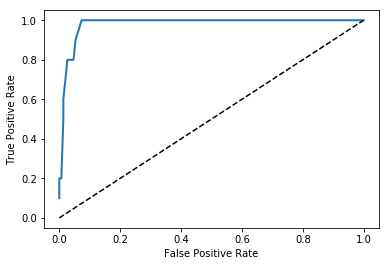

In [70]:
from sklearn.metrics import roc_curve
pred_probs = rf_base.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:,1], pos_label=1)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

[Text(0,0,'Total'),
 Text(0,0,'HP'),
 Text(0,0,'Sp. Atk'),
 Text(0,0,'Speed'),
 Text(0,0,'Attack'),
 Text(0,0,'Sp. Def'),
 Text(0,0,'Defense')]

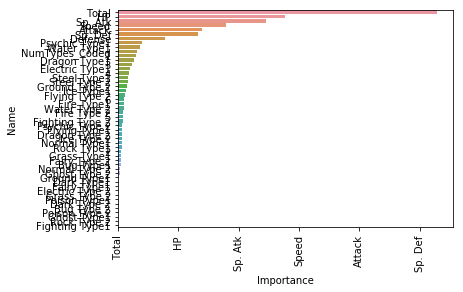

In [71]:
ftImp = {'Name': fts, 'Importance': rf_base.feature_importances_}
ftImp_df = pd.DataFrame(ftImp)
ftImp_df = ftImp_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)
ftplt = sns.barplot(x='Importance',y='Name', data=ftImp_df)
ftplt.set_xticklabels(ftImp_df['Name'],rotation=90)

Looking at the importance values it appears that many of the types are not adding any information. So lets drop these and see if the model performance is improved.

In [72]:
fts = ['Attack','Defense','HP','Total','Sp. Atk', 'Sp. Def','Speed', 'NumTypes_Coded'] + list(gen_cols)
X_train, X_test, y_train, y_test = train_test_split(model_df[fts], model_df['Lgnd_Label'], test_size=0.2, random_state=42)
rf_base2 = RandomForestClassifier(random_state=26)
rf_base2.fit(X_train, y_train)
preds = rf_base2.predict(X_test)
print('The accuracy of the model was:', accuracy_score(y_test,preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds, target_names=['NonLegendary','Legendary']))

The accuracy of the model was: 0.95
[[146   4]
 [  4   6]]
              precision    recall  f1-score   support

NonLegendary       0.97      0.97      0.97       150
   Legendary       0.60      0.60      0.60        10

 avg / total       0.95      0.95      0.95       160



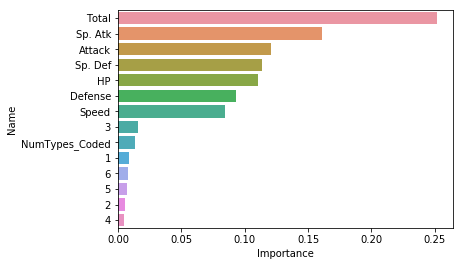

In [73]:
ftImp = {'Name': fts, 'Importance': rf_base2.feature_importances_}
ftImp_df = pd.DataFrame(ftImp)
ftImp_df = ftImp_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)
sns.barplot(x='Importance',y='Name', data=ftImp_df)

The performance of the model is about the same so lets see if using smote upsampling can improve the performance of the model with only these features included. The thinking being that by upsampling the minority class it will help the model learn the distinctions between the two easier. Note that smote is only applied to the training data and not the testing data so as not to alter the distribution in the testing test. 

In [75]:
#create the smote data sets
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=44)
X_smote, y_smote = sm.fit_sample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=56)
rf_smote.fit(X_smote, y_smote)
preds = rf_smote.predict(X_test)
print('The accuracy of the model was:', accuracy_score(y_test,preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds, target_names=['NonLegendary','Legendary']))

The accuracy of the model was: 0.9375
[[143   7]
 [  3   7]]
              precision    recall  f1-score   support

NonLegendary       0.98      0.95      0.97       150
   Legendary       0.50      0.70      0.58        10

 avg / total       0.95      0.94      0.94       160



It appears that training the model using smote provides marginal improvement. Therefore I will use this training data to perform the grid search.

In [76]:
from sklearn.model_selection import GridSearchCV
#define the parameter space to search
max_depth = range(1,9,1)
min_samples_leaf = range(2,5,1)
n_trees = range(10, 101, 10)

params = {'n_estimators': n_trees,'min_samples_leaf': min_samples_leaf,
          'max_depth': max_depth}

#perform the grid search
rf_gscv = RandomForestClassifier(random_state = 4)
gscv_rf_smote = GridSearchCV(rf_gscv, param_grid=(params), scoring = 'f1', cv = 5)
gscv_rf_smote.fit(X_smote, y_smote)
#fit a final model on the best parameter results of the grid search and test its performance
fin_rf = gscv_rf_smote.best_estimator_
fin_rf.fit(X_smote, y_smote)
y_pred_fin = fin_rf.predict(X_test)
print('The accuracy of the model was:', accuracy_score(y_test,preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds, target_names=['NonLegendary','Legendary']))

The accuracy of the model was: 0.9375
[[143   7]
 [  3   7]]
              precision    recall  f1-score   support

NonLegendary       0.98      0.95      0.97       150
   Legendary       0.50      0.70      0.58        10

 avg / total       0.95      0.94      0.94       160



## Conclusions

Overall this analysis revealed that one of the key differences between legendary and non-legendary pokemon is their total sum of power points. From the feature importances from the model it is also apparent that special attack power can serve as an indicator for legendary pokemon. Although the models performance was not great it did do a decent job at classifying pokemon as legendary or not and reveal which features are mor important then others in making this prediction.